<a href="https://colab.research.google.com/github/NayaraKarlla/Analise-Exploratoria-de-Dados-ENEM/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objeto de Estudo**
Vamos trabalhar com informações de microdados (menor nível de detalhamento dos dados) do ENEM realizado em 2019, utilizando uma amostra que representa 10% do total. De acordo com o site do INEP, o ENEM tem como objetivo avaliar o desempenho escolar dos estudantes ao final da educação básica. As notas do exame podem ser utilizadas para o ingresso no Sistema de Seleção Unificada (Sisu), no Programa Universidade para Todos (ProUni) e para pleitear financiamento estudantil por meio de programas do governo, como o Fundo de Financiamento Estudantil (Fies).

## **Objetivo: realizar análise exploratória dos dados para gerar insights**
Conhecer bem os dados dos participantes da prova pode fornecer insights valiosos para a educação brasileira. Neste estudo, vamos avaliar se dados demográficos, indicadores sociais, escolaridade dos pais e outras variáveis apresentam correlação com as notas dos candidatos. Muitos insights e respostas podem ser obtidos por meio da análise exploratória de dados.

In [ ]:
# importando as bibliotecas para leitura dos dados e criação de gráficos
import pandas as pd
from matplotlib import pyplot as plt #  é um submódulo dentro de matplotlib que permite criar figuras, adicionar e personalizar eixos, rótulos, títulos etc., com comandos simples.
import seaborn as sns
import os # módulo os, que permite interagir com o sistema operacional

# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)    # display.max_rows, define o número máximo de linhas que serão mostradas quando você exibe um DataFrame, None significa: mostrar todas as linhas, sem cortar.
pd.set_option('display.max_columns', None) # display.max_columns, define o número máximo de colunas a serem exibidas.

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
# Converter csv em parquet # Parquet é um formato de arquivo usado principalmente para armazenar grandes volumes de dados tabulares de forma eficiente. Ele é muito usado em Big Data, ciência de dados e engenharia de dados.
df_enem_csv = pd.read_csv('./data/enem_2019.csv')
df_enem_csv.to_parquet('./data/enem_2019.parquet')

In [ ]:
# Os dados originais estão em csv, mas salvar em parquet economiza bastante
df_enem = pd.read_parquet('/content/enem_2019_amostra_10.parquet')
df_enem.shape # shape mostra a quantidade de linhas e colunas

(509527, 136)

In [ ]:
# Instalar o pyarrow # instala o pyarrow para converter o csv em parquet
!pip install pyarrow

In [ ]:
# Primeira visualização dos dados:
df_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,190005708034,2019,2305506,Iguatu,23,CE,22.00,F,1,3,1,2305506.00,Iguatu,23.00,CE,1,3,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2305506,Iguatu,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,190003326900,2019,3548500,Santos,35,SP,19.00,F,1,1,1,3548500.00,Santos,35.00,SP,1,1,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3548500,Santos,35,SP,1,1,1,1,503.00,508.00,512.00,515.00,543.90,527.70,545.30,513.90,ACDDCEDEDCCBCBBBBAACECADABAEBBDEEACCECBBCBDDC,ACAABDBEEAABDCCAACBEEDCBDEDBBCCCBCEBDDCABCCBB,BBEEA99999DEEBECBBCACDEAABEEBBECEBAAEDCBECADCE...,EBBADECCAEBBCDECCAEBCABDBCDEBBADBDCABAEBDCCEC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,190004261548,2019,3552106,Socorro,35,SP,16.00,F,1,1,1,3552106.00,Socorro,35.00,SP,3,0,1,NaN,1,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552106,Socorro,35,SP,1,1,1,1,504.00,509.00,514.00,516.00,406.10,521.20,549.20,510.50,ADCAEDAEADACDCBACEDEABCEBBAEBABBACEEDEACAABCD,ADACCCACDBAABBBDBAEABCCEACAABDEBAECAEDAEDAACE,99999ABCABBAEBCDEDEBDAADCEDCDECBDBDBBECAEDCCBC...,BECACAABACBCABCACDACBDCCDACAAEBCECAECEBCAECEE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,190001849598,2019,3541000,Praia Grande,35,SP,22.00,M,1,1,1,3541000.00,Praia Grande,35.00,SP,1,5,1,1.00,0,NaN,NaN,None,N

In [ ]:
# Quantidade de linhas e colunas
df_enem.shape

(509527, 136)

In [ ]:
# Será que cada linha é mesmo um candidato? # len : Conta quantos valores únicos existem e unique: Retorna todos os valores únicos (não repetidos) dessa coluna
len(df_enem['NU_INSCRICAO'].unique())  # todos os números de inscrição são únicos, não tem nenhum repetido

509527

In [ ]:
df_enem.dtypes # avaliando os tipos dos dados do conjunto

,0
NU_INSCRICAO,int64
NU_ANO,int64
CO_MUNICIPIO_RESIDENCIA,int64
NO_MUNICIPIO_RESIDENCIA,object
CO_UF_RESIDENCIA,int64
SG_UF_RESIDENCIA,object
NU_IDADE,float64
TP_SEXO,object
TP_ESTADO_CIVIL,int64
TP_COR_RACA,int64


In [ ]:
# essa é uma forma extensa de escrever para tirar algumas colunas, a melhor opção é usar o list_compreension que está a sequência abaixo
lista_colunas_com_nu = []

for coluna in df_enem.columns:
  if 'NU' in coluna:
      lista_colunas_com_nu.append(coluna)

lista_colunas_com_nu

['NU_INSCRICAO',
 'NU_ANO',
 'NU_IDADE',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [ ]:
# Usando a list_compreension para escrever a proposta anterior porém como menos linhas
lista_colunas_com_nu = [coluna for coluna in df_enem.columns if 'NU' in coluna]
lista_colunas_com_nu

['NU_INSCRICAO',
 'NU_ANO',
 'NU_IDADE',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [ ]:
# Vamos remover algumas colunas com as respostas, já que não vamos analisar no nível de questões das provas
colunas_questoes = [coluna for coluna in df_enem.columns if coluna.startswith('TX_')]
colunas_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [ ]:
# Ainda, as colunas do tipo CO_ não servem para nossa análise, são só códigos de coisas que temos siglas (UF, por exemplo)
colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith('CO_')]
colunas_codigos

['CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [ ]:
# Também não vamos fazer uma análise por municípios, então vamos remover tudo que tiver essa string
colunas_municipios = [coluna for coluna in df_enem.columns if 'MUNICIPIO' in coluna]
colunas_municipios

['CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [ ]:
# Trás todas as colunas que foram separadas na list_compreension
colunas_questoes + colunas_codigos + colunas_municipios

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [ ]:
# Removendo as colunas (inscrição e ano não são necessários)
colunas_remover = colunas_questoes + colunas_codigos + colunas_municipios + ['NU_INSCRICAO', 'NU_ANO']
df_enem = df_enem.drop(colunas_remover, axis=1) # o axis=1 procurará as informações nas colunas e não nas linhas pelo índice
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B
2759179,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B


In [ ]:
df_enem.shape

(509527, 109)

## Dicionário de dados

Percebemos que muitas das colunas possuem somente números, sem descrições. Os dados do ENEM vem acompanhados das descrições com o dicionário, explicando o que cada coluna representa. Seguem algumas que vamos utilizar na análise

Estado Civil (TP_ESTADO_CIVIL)

| Código | Descrição                               |
|--------|-----------------------------------------|
|    0   | Não informado                           |
|    1   | Solteiro(a)                             |
|    2   | Casado(a)/Mora   com companheiro(a)     |
|    3   | Divorciado(a)/Desquitado(a)/Separado(a) |
|    4   | Viúvo(a)                                |

Cor/Raça (TP_COR_RACA)

| Código | Descrição     |
|--------|---------------|
| 0      | Não declarado |
| 1      | Branca        |
| 2      | Preta         |
| 3      | Parda         |
| 4      | Amarela       |
| 5      | Indígena      |

Tipo Nacionalidade

| Código | Descrição                                       |
|--------|-------------------------------------------------|
| 0      | Não informado                                   |
| 1      | Brasileiro(a)                                   |
| 2      | Brasileiro(a)   Naturalizado(a)                 |
| 3      | Estrangeiro(a)                                  |
| 4      | Brasileiro(a)   Nato(a), nascido(a) no exterior |
| 5      | Indígena                                        |

Situação de Conclusão Nível Médio

| Código | Descrição                                              |
|--------|--------------------------------------------------------|
| 1      | Já concluí o   Ensino Médio                            |
| 2      | Estou   cursando e concluirei o Ensino Médio em 2019   |
| 3      | Estou   cursando e concluirei o Ensino Médio após 2019 |
| 4      | Não   concluí e não estou cursando o Ensino Médio      |

Finalmente, as colunas de notas

| Coluna     | Descrição                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ciências da Natureza |
| NU_NOTA_CH | Nota da prova de Ciências Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e Códigos |
| NU_NOTA_MT | Nota da prova de Matemática

##  Começando com estatística descritiva

Vamos conhecer as medidas estatísticas, de tendência central, dispersão, separatrizes e distribuições para conhecermos melhor os dados que estamos trabalhando.

In [ ]:
df_enem.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,509519.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,287993.00,509527.00,114894.00,114894.00,114894.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,371475.00,392613.00,392613.00,371475.00,509527.00,392613.00,392613.00,392613.00,392613.00,392613.00,392613.00,392613.00,509527.00
mean,22.10,1.08,2.13,1.03,1.54,2.96,1.33,1.00,0.12,2.25,1.04,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.77,0.77,0.73,477.66,507.25,520.46,522.92,0.52,1.14,120.49,122.73,114.82,121.66,91.60,571.30,3.87
std,7.47,0.44,1.02,0.21,0.72,4.11,0.55,0.07,0.33,0.75,0.19,0.12,0.04,0.01,0.02,0.02,0.00,0.04,0.02,0.04,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.01,0.00,0.04,0.01,0.01,0.03,0.04,0.04,0.03,0.01,0.05,0.01,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.44,0.42,0.42,0.44,76.00,82.22,64.02,108.94,0.50,0.79,33.40,42.93,40.17,38.14,59.45,188.74,1.48
min,12.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,18.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,417.80,448.00,483.50,435.10,0.00,1.00,120.00,120.00,100.00,100.00,40.00,480.00,3.00
50%,19.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [ ]:
df_enem.info # Serve para mostrar um resumo das informações do DataFrame df_enem, demora bastante para rodar

In [ ]:
colunas_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
colunas_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [ ]:
# Vamos ficar só com a nota principal da redação, aqui estamos removendo as outras
colunas_notas = [coluna for coluna in colunas_notas if 'COMP' not in coluna]
colunas_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

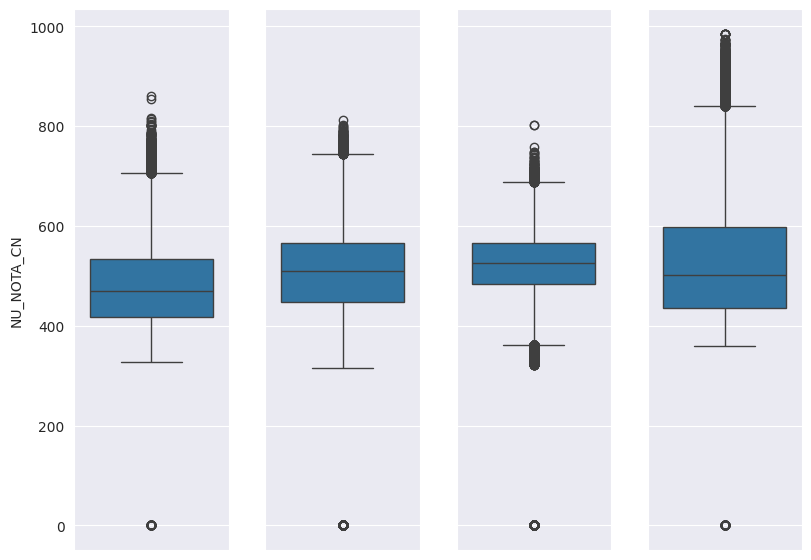

In [ ]:
# Analisando as notas

sns.set_style("darkgrid") # Isso define o estilo visual dos gráficos do Seaborn."darkgrid" adiciona uma grade escura no fundo, facilitando a visualização de gráficos com linhas ou caixas (como boxplots).
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6)) # Cria 4 gráficos lado a lado (1 linha, 4 colunas).sharey=True faz com que todos compartilhem o mesmo eixo Y. figsize=(8, 6) define o tamanho total da figura em polegadas. graficos será um array com os 4 eixos (axes) individuais — um para cada gráfico.
plt.tight_layout() # Evita que os subgráficos fiquem sobrepostos entre si ou com os rótulos.

for i in range(4): # Loop que percorre as 4 primeiras colunas da lista colunas_notas. Para cada uma, é criado um boxplot no eixo correspondente (graficos[i]). O eixo Y mostra os valores da coluna atual de df_enem, que deve ser um DataFrame com dados do ENEM.
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_enem, y=coluna_1, ax=graficos[i])

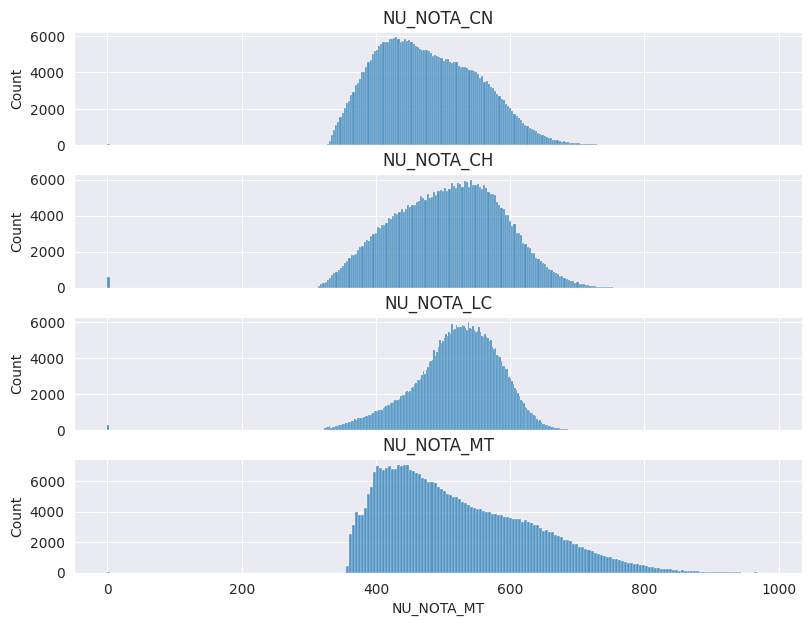

In [ ]:
# Analisando as distribuições das notas, anota de matemática chama atenção por se mais dispersa para a direita, indicando que poucas pessoas tiram notas boas acima de 800 pontos e grande parte está concentrada nos 400 pontos.
sns.set_style("darkgrid")
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(8,6)) # 4 linhas e 1 coluna
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.histplot(data=df_enem[coluna_1], ax=graficos[i]).set_title(coluna_1)

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

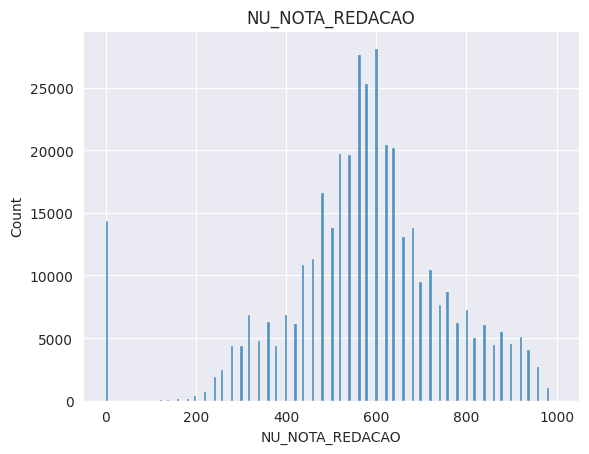

In [ ]:
# Analisando a nota da redação, esse não é o melhor gráfico para ver esse tipo de dado porque as notas não são muito dispersas, é apenas um exemplo para vizualização e exercício
sns.histplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

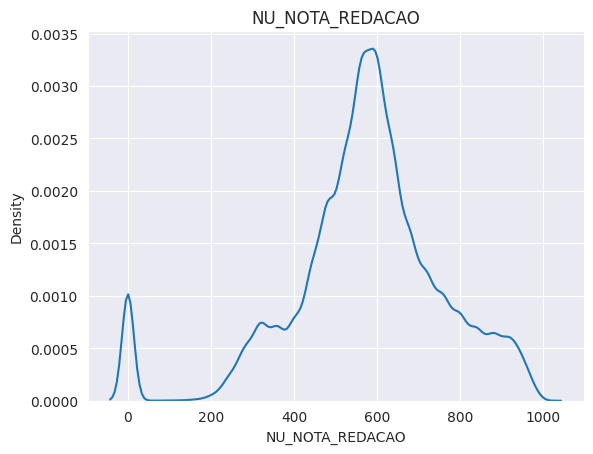

In [ ]:
# Vamos tentar um gráfico de densidade para melhorar a vizualização
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

##Analisando as informações demográficas

In [ ]:
# Visualizando os dados
df_enem.head()


,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B
2759179,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B


In [ ]:
# Reiniciando o índice pois essa apresentação não está amigável. A função reset_index() é usada para redefinir o índice do DataFrame. Por padrão, quando você reseta o índice, o índice antigo vira uma coluna normal. O parâmetro drop=True indica que você não quer manter o índice antigo como coluna — ou seja, ele é descartado. Então, essa linha cria um novo índice padrão, que é uma sequência numérica começando de 0
df_enem = df_enem.reset_index(drop=True)
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
2,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
3,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B
4,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B


In [ ]:
# Analisando a idade dos candidatos, ordenado da maior quantidade para a menor
df_enem['NU_IDADE'].value_counts()

,count
NU_IDADE,
18.00,86634
17.00,84619
19.00,57786
20.00,41133
16.00,31369
21.00,28944
22.00,23356
23.00,18516
24.00,15612


In [ ]:
# Analisando a idade dos candidatos
df_enem['NU_IDADE'].value_counts().sort_index()

,count
NU_IDADE,
12.00,6
13.00,23
14.00,529
15.00,7824
16.00,31369
17.00,84619
18.00,86634
19.00,57786
20.00,41133


<Axes: xlabel='NU_IDADE', ylabel='Density'>

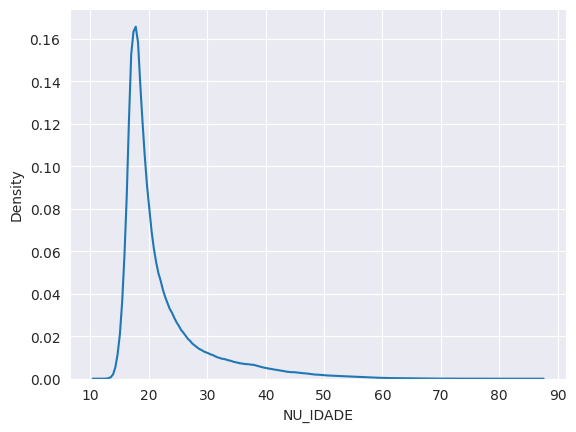

In [ ]:
sns.kdeplot(data=df_enem, x='NU_IDADE')

In [ ]:
# As mulheres são maioria no exame do Enem.
df_enem['TP_SEXO'].value_counts() # value_counts(): Conta quantas vezes cada sexo aparece na coluna TP_SEXO do DataFrame df_enem.

,count
TP_SEXO,
F,303139
M,206388


In [ ]:
# Calcular a proporção
df_enem['TP_SEXO'].value_counts(normalize=True) # normalize=True: é usada para calcular a proporção (ou porcentagem relativa) de cada categoria na coluna TP_SEXO. Os valores vão de 0 a 1 (fração), e a soma total será 1 (ou 100% se multiplicar por 100)

,proportion
TP_SEXO,
F,0.59
M,0.41


In [ ]:
# Calcular a proporção em porcentagem
df_enem['TP_SEXO'].value_counts(normalize=True) * 100

,proportion
TP_SEXO,
F,59.49
M,40.51


<Axes: xlabel='TP_SEXO', ylabel='count'>

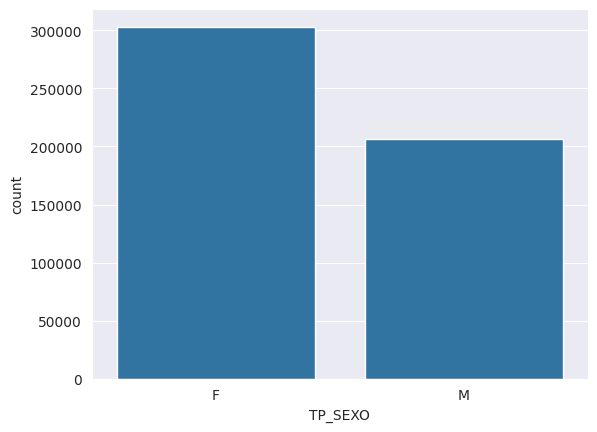

In [ ]:
sns.countplot(data=df_enem, x='TP_SEXO') # usa a biblioteca Seaborn para criar um gráfico de barras de contagem (ou seja, quantas pessoas há de cada sexo)

In [ ]:
'''
0 Não informado
1 Solteiro(a)
2 Casado(a)/Mora com companheiro(a)
3 Divorciado(a)/Desquitado(a)/Separado(a)
4 Viúvo(a)
'''
# ... é uma forma de comentar um bloco de texto em Python.

# Conta quantas pessoas há em cada categoria de estado civil dos participantes do ENEM e ordenar os resultados pelo código da categoria
df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

,count
TP_ESTADO_CIVIL,
0,20345
1,439950
2,39834
3,8763
4,635


<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

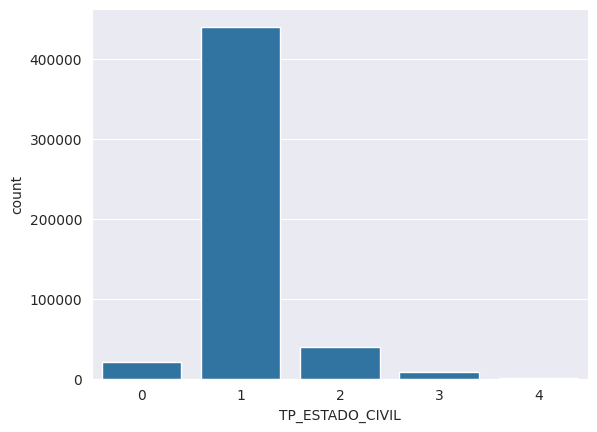

In [ ]:
# Usa o Seaborn para criar um gráfico de barras que mostra a distribuição do estado civil dos participantes do ENEM.
# sns.countplot() É a versão visual de value_counts()

sns.countplot(data=df_enem, x='TP_ESTADO_CIVIL')

In [ ]:
# Conta quantas pessoas há em cada tipo de raça dos participantes do ENEM e ordenar os resultados pelo código do tipo
df_enem['TP_COR_RACA'].value_counts().sort_index()

,count
TP_COR_RACA,
0,10446
1,183179
2,64694
3,236369
4,11616
5,3223


In [ ]:
# Conta quantas pessoas há em cada tipo de raça dos participantes do ENEM e ordenar os resultados pelo código do tipo

'''
0 Não declarado
1 Branca
2 Preta
3 Parda
4 Amarela
5 Indígena
'''
df_enem['TP_COR_RACA'].value_counts().sort_index()

,count
TP_COR_RACA,
0,10446
1,183179
2,64694
3,236369
4,11616
5,3223


<Axes: xlabel='TP_COR_RACA', ylabel='count'>

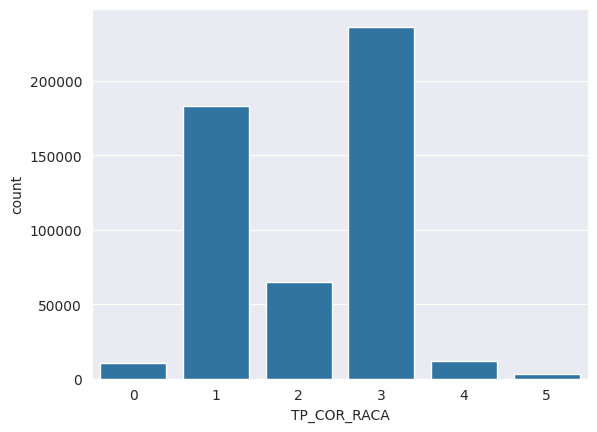

In [ ]:
# Usa o Seaborn para criar um gráfico de barras que mostra a distribuição de raças dos participantes do ENEM.
# sns.countplot() É a versão visual de value_counts()

sns.countplot(data=df_enem, x='TP_COR_RACA')

In [ ]:
# .value_counts(): Conta quantas vezes cada sigla (UF) aparece, uu seja, quantos participantes são de cada estado e retorna uma Series com as siglas como índice, as contagens como valores.A ordenação padrão é do maior para o menor (estado com mais participantes primeiro).

ufs = df_enem['SG_UF_RESIDENCIA'].value_counts()
ufs

,count
SG_UF_RESIDENCIA,
SP,81333
MG,53702
BA,39880
RJ,34042
CE,29581
PA,27861
PE,27051
MA,22157
RS,21989


In [ ]:
df_ufs = pd.DataFrame({'uf': ufs.index, 'candidatos': ufs.values}) # Essa linha cria um novo DataFrame chamado df_ufs que organiza, de forma tabular, a quantidade de candidatos por estado (UF), a partir de uma Series chamada ufs
df_ufs.head()

,uf,candidatos
0,SP,81333
1,MG,53702
2,BA,39880
3,RJ,34042
4,CE,29581


In [ ]:
import plotly.express as px # Importa a biblioteca Plotly Express com o apelido px.Essa é uma biblioteca para visualizações interativas e modernas em Python

fig = px.treemap(data_frame=df_ufs, # fig = px.treemap(...): Cria um treemap (gráfico de árvore), que mostra categorias como retângulos, onde o tamanho de cada retângulo é proporcional ao valor associado.
    path = ['uf'],                  # data_frame=df_ufs: usa um DataFrame chamado df_ufs, que deve conter: uma coluna com as siglas dos estados (uf), uma coluna com o número de candidatos (candidatos)
    values = 'candidatos'           # path=['uf']: define o nível de agrupamento do treemap. Neste caso, só um nível: o estado (uf)
)                                   # values='candidatos': define a métrica de tamanho dos blocos, quanto mais candidatos, maior o retângulo do estado.
fig.update_traces(root_color="lightgrey") # Define a cor do "bloco raiz" do treemap (o fundo geral que agrupa todos os retângulos).
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25)) # Ajusta as margens do gráfico (top, left, right, bottom) para não ficar colado nas bordas da tela.
fig.show() # Exibe o gráfico interativo

In [ ]:
# Até que série seu pai, ou o homem responsável por você, estudou?
# Aqui tem muito mais pessoas que não sabem a escolaridade do pai comparado com os que não sabem a escolaridade da mãe, isso mostra a realidade da ausência do pai nos lares dos brasileiros.
'''
A Nunca estudou.
B Não completou a 4ª série/5º ano do Ensino Fundamental.
C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E Completou o Ensino Médio, mas não completou a Faculdade.
F Completou a Faculdade, mas não completou a Pós-graduação.
G Completou a Pós-graduação.
H Não sei.
'''
df_enem['Q001'].value_counts().sort_index()

,count
Q001,
A,29079
B,113489
C,72236
D,58789
E,130900
F,37494
G,22957
H,44583


In [ ]:
# Avaliando o impacto nos dados daqueles que responderam que não sabe
# Calcula a proporção de participantes do ENEM cuja resposta na questão Q001 foi 'H
# Explicação detalhada abaixo:

'''
df_enem['Q001'] == 'H': Filtra os dados para encontrar quem respondeu 'H' na questão Q001.

🔹 df_enem.loc[...]
Usa o .loc[] para selecionar todas as linhas do DataFrame onde a condição (Q001 == 'H') é verdadeira.

🔹 len(...)
Conta quantas linhas foram selecionadas, ou seja, quantos participantes responderam 'H' na Q001.

🔹 df_enem.shape[0]
df_enem.shape retorna uma tupla com (n_linhas, n_colunas).

df_enem.shape[0] pega o número total de linhas, ou seja, quantos participantes há no DataFrame.

🔹 Divisão
A divisão len(...) / df_enem.shape[0] calcula a fração de participantes que responderam 'H', ou seja, a proporção sobre o total.
'''

len(df_enem.loc[df_enem['Q001'] == 'H']) / df_enem.shape[0] *100

8.74987979047234

In [ ]:
# Até que série sua mãe, ou a mulher responsável por você, estudou?
'''
A Nunca estudou.
B Não completou a 4ª série/5º ano do Ensino Fundamental.
C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E Completou o Ensino Médio, mas não completou a Faculdade.
F Completou a Faculdade, mas não completou a Pós-graduação.
G Completou a Pós-graduação.
H Não sei.
'''

df_enem['Q002'].value_counts().sort_index()

,count
Q002,
A,19580
B,85678
C,68403
D,67117
E,162963
F,51384
G,39806
H,14596


In [ ]:
# Avaliando o impacto nos dados daqueles que responderam que não sabe
len(df_enem.loc[df_enem['Q002'] == 'H']) / df_enem.shape[0] *100

2.8646175766936786

In [ ]:
# Criando novas variáveis para delimitar pais que possuem nível superior
# Criam novas colunas booleanas no DataFrame df_enem, indicando se o pai ou a mãe do participante possuem ensino superior completo ou incompleto
df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F', 'G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F', 'G'])
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior
0,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B,False,False
1,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B,False,False
2,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B,True,True
3,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B,False,False
4,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B,False,False


In [ ]:
# Calcula a porcentagem de participantes do ENEM cujo pai tem ensino superior (completo ou incompleto), com base na coluna pai_possui_superior
df_enem['pai_possui_superior'].value_counts(normalize=True) * 100 # Conta quantas vezes aparecem os valores True e False.Com normalize=True, em vez de mostrar a contagem absoluta, mostra a proporção (fração).

,proportion
pai_possui_superior,
False,88.14
True,11.86


<Axes: xlabel='pai_possui_superior', ylabel='count'>

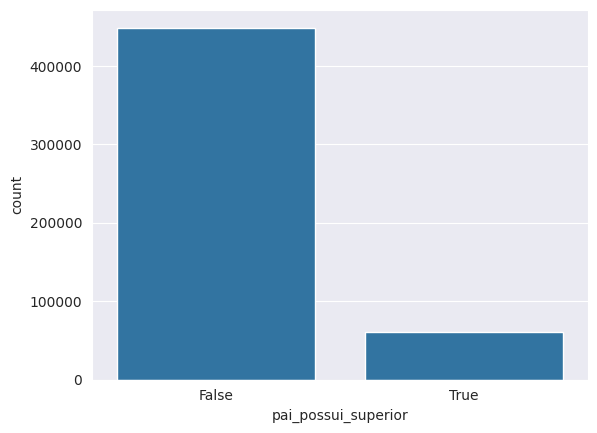

In [ ]:
# Até que série seu pai, ou o homem responsável por você, estudou?
sns.countplot(data=df_enem, x='pai_possui_superior')

In [ ]:
# Calcula a porcentagem de participantes do ENEM cujo pai tem ensino superior (completo ou incompleto), com base na coluna pai_possui_superior
df_enem['mae_possui_superior'].value_counts(normalize=True) * 100

,proportion
mae_possui_superior,
False,82.10
True,17.90


<Axes: xlabel='mae_possui_superior', ylabel='count'>

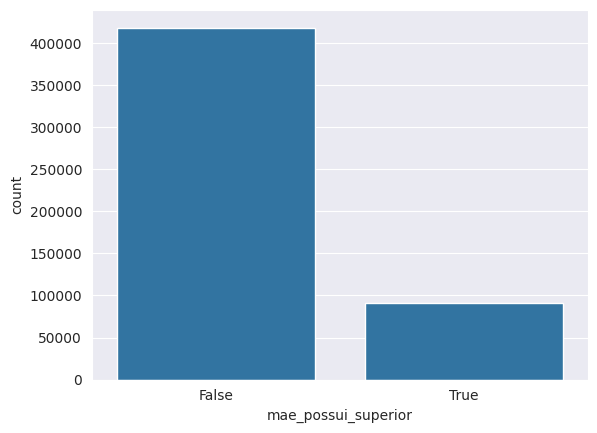

In [ ]:
# Até que série sua mãe, ou a mulher responsável por você, estudou?
sns.countplot(data=df_enem, x='mae_possui_superior')

In [ ]:
lista = ['a', 'b', 'c'] # Cria uma lista com três letras: `'a'`, `'b'` e `'c'`
d = dict()              # Cria um dicionário vazio chamado d, onde os pares chave-valor serão armazenados.

for i, caractere in enumerate(lista):    # Usa `enumerate()` para iterar sobre a lista **com o índice** (`i`) e o **valor** (`caractere`) ao mesmo tempo.Exemplo:1ª iteração: `i = 0`, `caractere = 'a'`, 2ª iteração: `i = 1`, `caractere = 'b'`, 3ª iteração: `i = 2`, `caractere = 'c'`
    print(f'{caractere} na posicao {i}') # Exibe uma mensagem no formato:a na posicao 0, b na posicao 1, c na posicao 2
    d[caractere] = i                     # Adiciona um item ao dicionário `d`, com: **Chave**: o caractere (ex: `'a'`) e  **Valor**: sua posição na lista (ex: `0`). Exemplo: {'a': 0, 'b': 1, 'c': 2}


a na posicao 0
b na posicao 1
c na posicao 2


In [ ]:
# Analisar a renda familiar. Vamos transformar Q006 em algo numérico?
# Esse código cria um dicionário que mapeia letras (de A a Q) para números inteiros de 0 a 16, representando faixas de renda familiar mensal dos participantes do ENEM

'''
A Nenhuma renda.
B Até R$ 998,00.
C De R$ 998,01 até R$ 1.497,00.
D De R$ 1.497,01 até R$ 1.996,00.
E De R$ 1.996,01 até R$ 2.495,00.
F De R$ 2.495,01 até R$ 2.994,00.
G De R$ 2.994,01 até R$ 3.992,00.
H De R$ 3.992,01 até R$ 4.990,00.
I De R$ 4.990,01 até R$ 5.988,00.
J De R$ 5.988,01 até R$ 6.986,00.
K De R$ 6.986,01 até R$ 7.984,00.
L De R$ 7.984,01 até R$ 8.982,00.
M De R$ 8.982,01 até R$ 9.980,00.
N De R$ 9.980,01 até R$ 11.976,00.
O De R$ 11.976,01 até R$ 14.970,00.
P De R$ 14.970,01 até R$ 19.960,00.
Q Mais de R$ 19.960,00.

'''

'''
🔹 from string import ascii_uppercase: Importa uma string com todas as letras maiúsculas do alfabeto inglês, de 'A' a 'Z'.

🔹 enumerate(ascii_uppercase): Itera sobre cada letra com seu índice. Exemplo: 'A' → 0, 'B' → 1 ...'Q' → 16

🔹 if i == 17: break -> Para o loop ao chegar na letra de índice 17 ('R'), porque as faixas vão só até a letra 'Q' (índice 16).Assim, o dicionário vai de 'A' até 'Q'.

🔹 dicionario_renda[letra] = i: Adiciona ao dicionário a letra como chave e o número como valor.
'''

from string import ascii_uppercase

dicionario_renda = dict()

# iterando sobre o alfabeto (python não é lindo?)
for i, letra in enumerate(ascii_uppercase):
    if i == 17:
        break
    dicionario_renda[letra] = i

dicionario_renda



{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16}

In [ ]:
# Conta quantos participantes do ENEM escolheram cada opção de resposta na questão Q006, que trata da renda familiar mensal.
df_enem['Q006'].value_counts()

,count
Q006,
C,131131
B,127512
D,49732
E,47487
G,30203
A,23258
F,22640
H,19420
I,14225


In [ ]:
 df_enem['Q006'].head()  # head retorna as primeiras 5 linhas dessa coluna 'Q006'.

,Q006
0,B
1,I
2,I
3,F
4,G


In [ ]:
# função de mapeamento

'''
A coluna Q006 contém letras ('A' até 'Q') que representam faixas de renda familiar dos participantes.

dicionario_renda é um dicionário que associa cada letra a um número (por exemplo, 'A':0, 'B':1, ..., 'Q':16), indicando a faixa de renda de forma numérica e ordenada.

O método .map() substitui cada valor da coluna Q006 pelo valor correspondente no dicionário.

O resultado é uma nova coluna chamada 'renda_familiar' com números inteiros, que facilitam análises quantitativas.
'''

df_enem['renda_familiar'] = df_enem['Q006'].map(dicionario_renda)

df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior,renda_familiar
0,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B,False,False,1
1,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B,False,False,8
2,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B,True,True,8
3,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B,False,False,5
4,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B,False,False,6


<Axes: xlabel='renda_familiar', ylabel='count'>

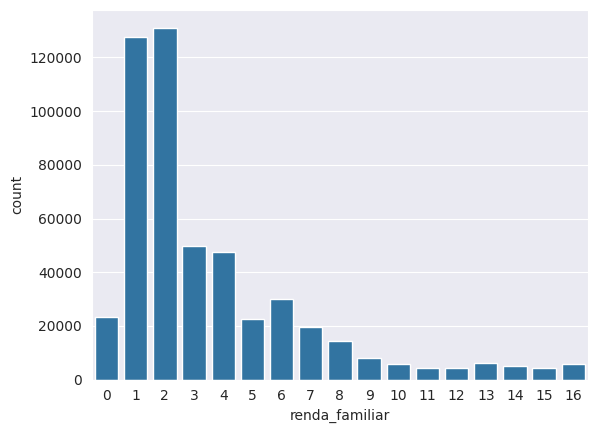

In [ ]:
# Análise de renda
sns.countplot(data=df_enem, x='renda_familiar')

## Relacionar notas com características dos candidatos </a>

Avaliar se as notas dos candidatos é diferente com relação a:
- sexo
- raça
- atendimento especial
- instrução de mae e pai
- renda mensal da familia

In [ ]:
# Criando df com as notas e sexo dos candidatos

'''
df_enem é o DataFrame original com todos os dados do ENEM.

colunas_notas é uma lista com os nomes das colunas que representam as notas das provas (por exemplo: 'NU_NOTA_MT', 'NU_NOTA_CN', etc.).

['TP_SEXO'] é uma lista contendo o nome da coluna do sexo do participante.

colunas_notas + ['TP_SEXO'] concatena as duas listas, formando uma lista com os nomes das colunas das notas + a coluna do sexo.

df_enem.loc[:, colunas_notas + ['TP_SEXO']] seleciona todas as linhas (:) e somente as colunas indicadas nessa lista (notas + sexo).

O resultado é um novo DataFrame chamado df_sexo que contém só as notas das provas e o sexo dos participantes.
'''

df_sexo = df_enem.loc[:, colunas_notas + ['TP_SEXO']]
df_sexo.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,F
1,543.90,527.70,545.30,513.90,680.00,F
2,406.10,521.20,549.20,510.50,480.00,F
3,520.50,488.00,549.20,599.40,500.00,M
4,577.10,587.00,610.70,747.00,780.00,M


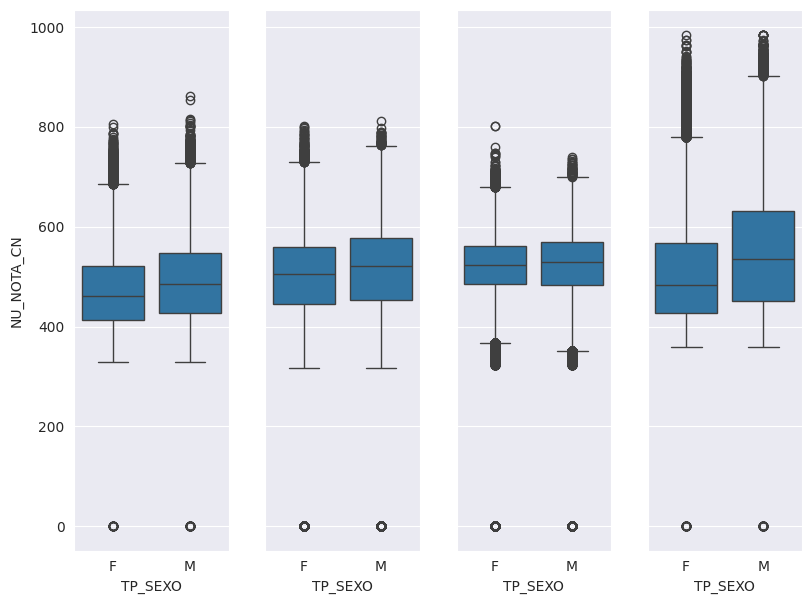

In [ ]:
# Analisando as notas por sexo
sns.set_style("darkgrid") # Configura o estilo visual dos gráficos do Seaborn para `"darkgrid"`
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6)) # sharey=True: todos os gráficos compartilham o mesmo eixo Y (notas), o que facilita a comparação.
                                                                  # figsize=(8,6): define o tamanho total da figura (8 unidades de largura por 6 de altura)
plt.tight_layout() # Ajusta automaticamente os espaços entre os subgráficos para que **não fiquem sobrepostos** e o layout fique mais limpo.

for i in range(4): #  Cria um laço que **repete 4 vezes**. O `i` assume os valores `0, 1, 2, 3`, correspondendo às posições das 4 áreas do ENEM (por exemplo: Ciências Humanas, Ciências da Natureza, Linguagens, Matemática).
    coluna_1 = colunas_notas[i] # A variável colunas_notas é uma lista com os nomes das colunas das notas das provas. Exemplo: ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']. coluna_1 recebe o nome da coluna da vez.Quando i = 0 → coluna_1 = 'NU_NOTA_CN'. Quando i = 1 → coluna_1 = 'NU_NOTA_CH', e assim por diante.
    sns.boxplot(data=df_sexo, y=coluna_1, x='TP_SEXO', ax=graficos[i]) # **Cria um boxplot** com o Seaborn:`data=df_sexo`: usa o DataFrame que contém as notas e o sexo dos candidatos.`x='TP_SEXO'`: coloca o sexo no eixo X (categorias: 'M', 'F').`y=coluna_1`: coloca as notas da prova atual no eixo Y.`ax=graficos[i]`: desenha o gráfico na **posição `i`** entre os 4 subgráficos criados com `plt.subplots()`.

In [ ]:
# Criando df com as notas e raça dos candidatos
df_raca = df_enem.loc[:, colunas_notas + ['TP_COR_RACA']]
df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,3
1,543.90,527.70,545.30,513.90,680.00,1
2,406.10,521.20,549.20,510.50,480.00,1
3,520.50,488.00,549.20,599.40,500.00,1
4,577.10,587.00,610.70,747.00,780.00,1


'\nEsse for vai rodar 2 vezes (para i = 0 e i = 1) e, a cada rodada:\n\n- Seleciona duas colunas de notas:\n\nEx: na 1ª rodada: coluna_1 = colunas_notas[0], coluna_2 = colunas_notas[1]\n\nna 2ª rodada: coluna_1 = colunas_notas[2], coluna_2 = colunas_notas[3]\n\n- Cria dois boxplots por linha:\n\nax=graficos[i][0]: coloca o gráfico da primeira prova na 1ª coluna da linha i\n\nax=graficos[i][1]: coloca o gráfico da segunda prova na 2ª coluna da linha i\n\n- Eixos:\n\nx=\'TP_COR_RACA\': mostra as categorias de cor/raça no eixo X (valores como 0, 1, 2... que representam grupos como "Branca", "Parda", "Preta", etc.).\n\ny=coluna: coloca a nota da prova no eixo Y.\n\n'

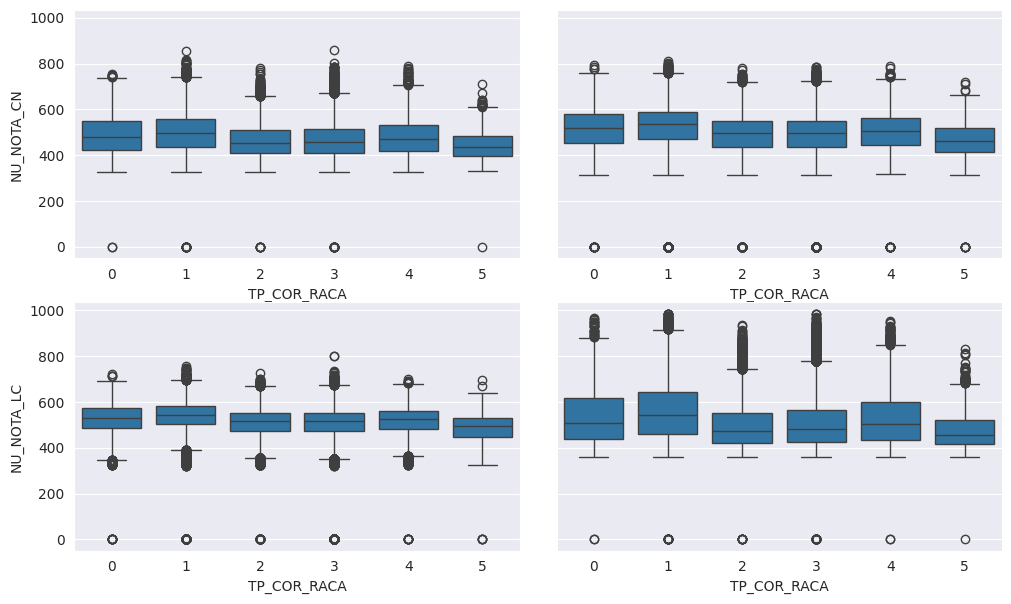

In [ ]:
# Analisando as notas por raça
'''
0 -> Não declarado
1 -> Branca
2 -> Preta
3 -> Parda
4 -> Amarela
5 -> Indígena
'''

sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(2):
    coluna_1 = colunas_notas[i*2]
    coluna_2 = colunas_notas[i*2+1]
    sns.boxplot(data=df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i][0])
    sns.boxplot(data=df_raca, y=coluna_2, x='TP_COR_RACA', ax=graficos[i][1])


# Explicação do for

'''
Esse for vai rodar 2 vezes (para i = 0 e i = 1) e, a cada rodada:

- Seleciona duas colunas de notas:

Ex: na 1ª rodada: coluna_1 = colunas_notas[0], coluna_2 = colunas_notas[1]

na 2ª rodada: coluna_1 = colunas_notas[2], coluna_2 = colunas_notas[3]

- Cria dois boxplots por linha:

ax=graficos[i][0]: coloca o gráfico da primeira prova na 1ª coluna da linha i

ax=graficos[i][1]: coloca o gráfico da segunda prova na 2ª coluna da linha i

- Eixos:

x='TP_COR_RACA': mostra as categorias de cor/raça no eixo X (valores como 0, 1, 2... que representam grupos como "Branca", "Parda", "Preta", etc.).

y=coluna: coloca a nota da prova no eixo Y.

'''

In [ ]:
# calcular atendimento especializado
colunas_atendimento_especializado = ['IN_BAIXA_VISAO',
                                     'IN_CEGUEIRA',
                                     'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
                                     'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA',
                                     'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO',
                                     'IN_DISLEXIA', 'IN_DISCALCULIA',
                                     'IN_AUTISMO', 'IN_VISAO_MONOCULAR',
                                     'IN_OUTRA_DEF']

df_atendimento_especializado = df_enem.loc[:, colunas_notas]
df_atendimento_especializado['atendimento_especializado'] = df_enem.loc[:, colunas_atendimento_especializado].sum(axis=1) > 0
df_atendimento_especializado.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,atendimento_especializado
0,NaN,NaN,NaN,NaN,NaN,False
1,543.90,527.70,545.30,513.90,680.00,False
2,406.10,521.20,549.20,510.50,480.00,False
3,520.50,488.00,549.20,599.40,500.00,False
4,577.10,587.00,610.70,747.00,780.00,False


In [ ]:
df_atendimento_especializado['atendimento_especializado'].value_counts()

,count
atendimento_especializado,
False,506207
True,3320


In [ ]:
df_atendimento_especializado['atendimento_especializado'].value_counts(normalize=True) * 100

,proportion
atendimento_especializado,
False,99.35
True,0.65


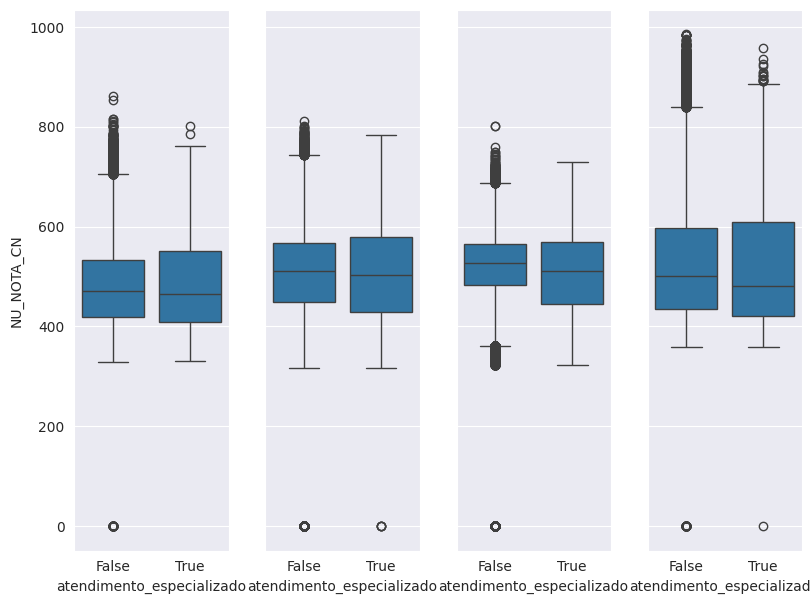

In [ ]:
# Analisando as notas por atendimento especializado, após observação dos dados, não tem correlação notas x atendimento especializado
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_atendimento_especializado, y=coluna_1, x='atendimento_especializado', ax=graficos[i])

In [ ]:
# Criando df com as notas e nível de instrução dos pais e mães
df_instrucao_pais = df_enem.loc[:, colunas_notas + ['pai_possui_superior','mae_possui_superior']]
df_instrucao_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior
0,NaN,NaN,NaN,NaN,NaN,False,False
1,543.90,527.70,545.30,513.90,680.00,False,False
2,406.10,521.20,549.20,510.50,480.00,True,True
3,520.50,488.00,549.20,599.40,500.00,False,False
4,577.10,587.00,610.70,747.00,780.00,False,False


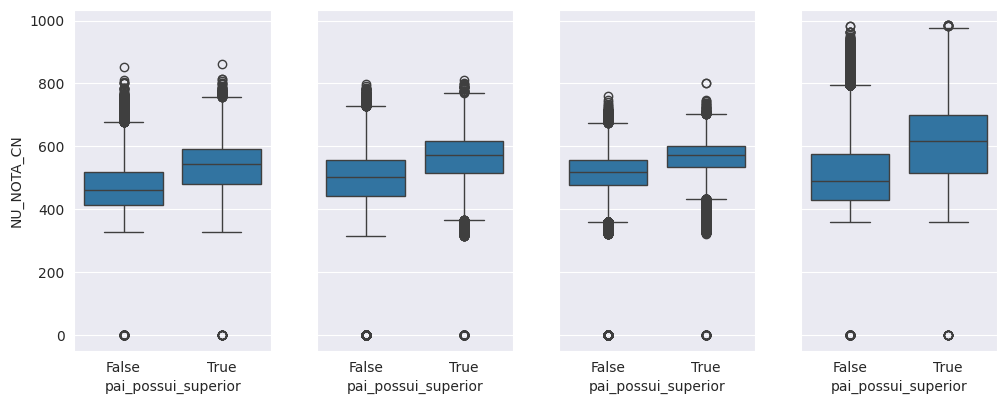

In [ ]:
# Analisando as notas por nivel instrução pais
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(10,4))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='pai_possui_superior', ax=graficos[i])

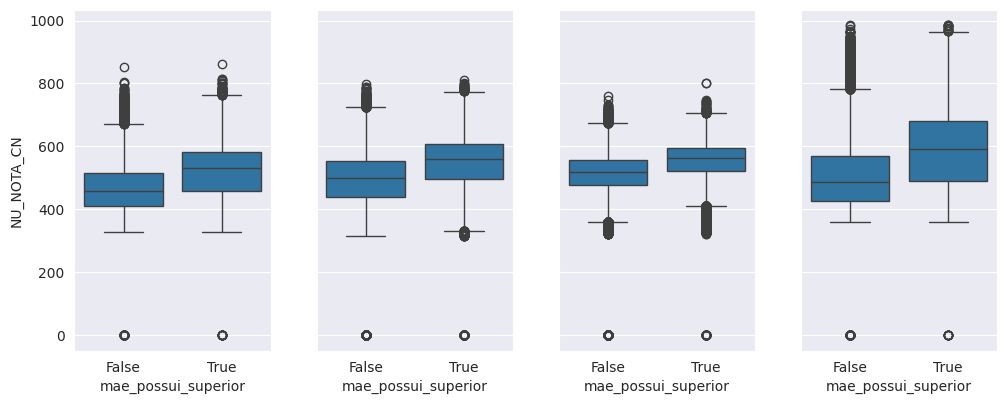

In [ ]:
# Analisando as notas por nivel instrução mães
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(10,4))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='mae_possui_superior', ax=graficos[i])

<Axes: xlabel='NU_IDADE', ylabel='NU_NOTA_CN'>

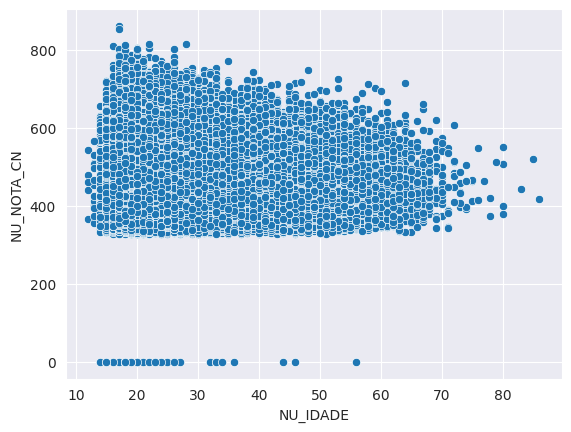

In [ ]:
# Analisando correlação de idades com notas
df_idade = df_enem.loc[:, colunas_notas + ['NU_IDADE']] # Seleciona todas as linhas (:) e apenas as colunas de notas + a coluna de idade.

sns.scatterplot(data=df_idade, x='NU_IDADE', y='NU_NOTA_CN') # sns.scatterplot: é uma função da biblioteca seaborn, usada para criar gráficos de dispersão (scatter plot).
                                                             # data=df_idade: define que os dados virão do DataFrame df_idade
                                                             # x='NU_IDADE': define o eixo x como a idade dos candidatos.
                                                             # y='NU_NOTA_CN': define o eixo y como a nota de Ciências da Natureza (CN).
                                                             # Resultado: um gráfico de dispersão que mostra a relação entre a idade dos candidatos e suas notas em Ciências da Natureza.
# Esse gráfico não trouxe insights relevantes.

 Para relembras a descrição das colunas de notas

| Coluna     | Descrição                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ciências da Natureza |
| NU_NOTA_CH | Nota da prova de Ciências Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e Códigos |
| NU_NOTA_MT | Nota da prova de Matemática

'\ncorrelacoes_idade = df_idade.corr()\n\nExplicação:\n\ndf_idade contém colunas com as notas dos participantes (como NU_NOTA_CN, NU_NOTA_CH, etc.) e a coluna NU_IDADE.\n\n.corr() é um método do pandas que calcula a correlação de Pearson entre todas as colunas numéricas do DataFrame.\n\nCorrelação de Pearson:\nMede a força e a direção de uma relação linear entre duas variáveis.\n\nVaria entre:\n\n+1: correlação positiva perfeita.\n\n0: nenhuma correlação linear.\n\n−1: correlação negativa perfeita.\n\n✅ Resultado: correlacoes_idade será uma matriz de correlação, onde cada célula mostra o grau de correlação entre duas variáveis numéricas do DataFrame.\n\n'

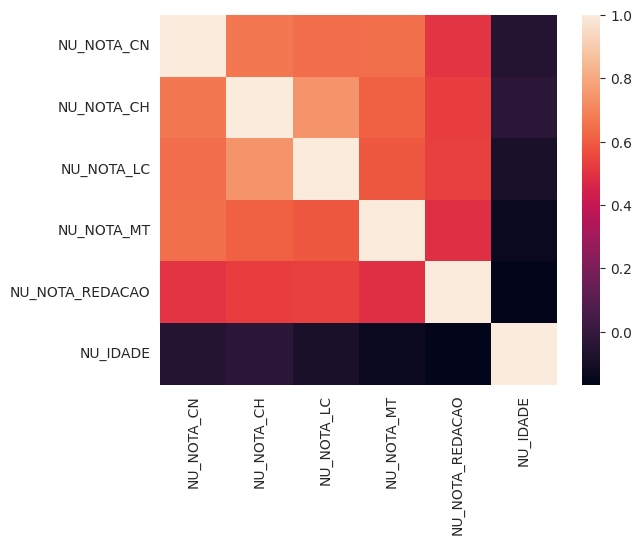

In [ ]:
# Analisando correlação de pearson entre as notas e a idade
correlacoes_idade = df_idade.corr()
sns.heatmap(correlacoes_idade) # O hetmap é o mapa de calor do Seaborn

'''
correlacoes_idade = df_idade.corr()

Explicação:

df_idade contém colunas com as notas dos participantes (como NU_NOTA_CN, NU_NOTA_CH, etc.) e a coluna NU_IDADE.

.corr() é um método do pandas que calcula a correlação de Pearson entre todas as colunas numéricas do DataFrame.

Correlação de Pearson:
Mede a força e a direção de uma relação linear entre duas variáveis.

Varia entre:

+1: correlação positiva perfeita.

0: nenhuma correlação linear.

−1: correlação negativa perfeita.

✅ Resultado: correlacoes_idade será uma matriz de correlação, onde cada célula mostra o grau de correlação entre duas variáveis numéricas do DataFrame.

'''
# A análise parte da escaça de 0.0 a 1.0, ou seja, quanto mais clara a cor maior a correção.
# Idade não tem correlação com nenhuma nota.
# A nota da Redação tem um pouco de relação com as notas de humanas, CH (Ciências Humanas) e LC (Linguagens e Códigos).

## **Conclusões**

**Base de Dados**
Amostra de 10% dos resultados das provas do ENEM 2019.

**Métodos Utilizados**
- Análise estatística descritiva;
- Diversificação de gráficos para entender as distribuições das características;
- Análise da distribuição das notas;
- Inferência de correlação e relação com diferentes variáveis.

**Principais Resultados e Insights**
Após a análise dos dados, observamos evidências de correlações entre algumas variáveis e as notas dos candidatos. A seguir, destacamos os principais insights:

- Apenas 0,65% dos candidatos declararam necessidade de atendimento especializado por deficiência.

- Raça: Candidatos indígenas apresentaram notas significativamente mais baixas em comparação com outras raças, o que pode indicar menor acesso à educação de qualidade.

- Renda familiar: Observou-se uma correlação moderada (pouco acima de 0,5) entre a renda familiar e a nota em Matemática.

- Origem socioeconômica: A maioria dos candidatos tem renda familiar inferior a R$2.000,00.

- Ausência paterna: Mais candidatos declararam não saber a escolaridade do pai (8%) do que da mãe (2%), o que pode refletir a ausência da figura paterna em muitos lares brasileiros.

- Escolaridade dos pais: Filhos de pais com ensino superior completo possuem notas mais altas no ENEM, com destaque para a disciplina de Matemática, onde a diferença é evidente.


**Baixa escolaridade dos pais:**

- 80% dos pais não possuíam ensino superior no ano em que o filho prestou o ENEM, o que indica que os pais tem filhos sem concluir a faculdade e durante a vida não concluem a mesma.

- Apenas 32% completaram o ensino médio.

- 17% não completaram a 4ª série/5º ano do Ensino Fundamental.

- 14% completaram a 4ª série/5º ano, mas não completaram a 8ª série/9º ano do Ensino Fundamental.

- 13% completaram a 8ª série/9º ano, mas não completaram o Ensino Médio.


**Perfil do candidato médio:**
O perfil mais comum entre os candidatos é: mulher, 18 anos, solteira, parda, com renda familiar inferior a R$1.500,00, pais sem ensino superior completo, residente nos estados de São Paulo (SP) e Minas Gerais (MG).

**Observações Finais:**
Com base nesta amostra, não foi possível confirmar correlação significativa entre as notas e as variáveis sexo, idade e necessidade de atendimento especializado.
